# Mod03 Project - Northwind Company: Question 1


In [1]:
# Imports & Setup
from mod3_func import *

# Ploting Libraries:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# SQL
import sqlite3 
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

<b>Display Northwind Data Schema</b>

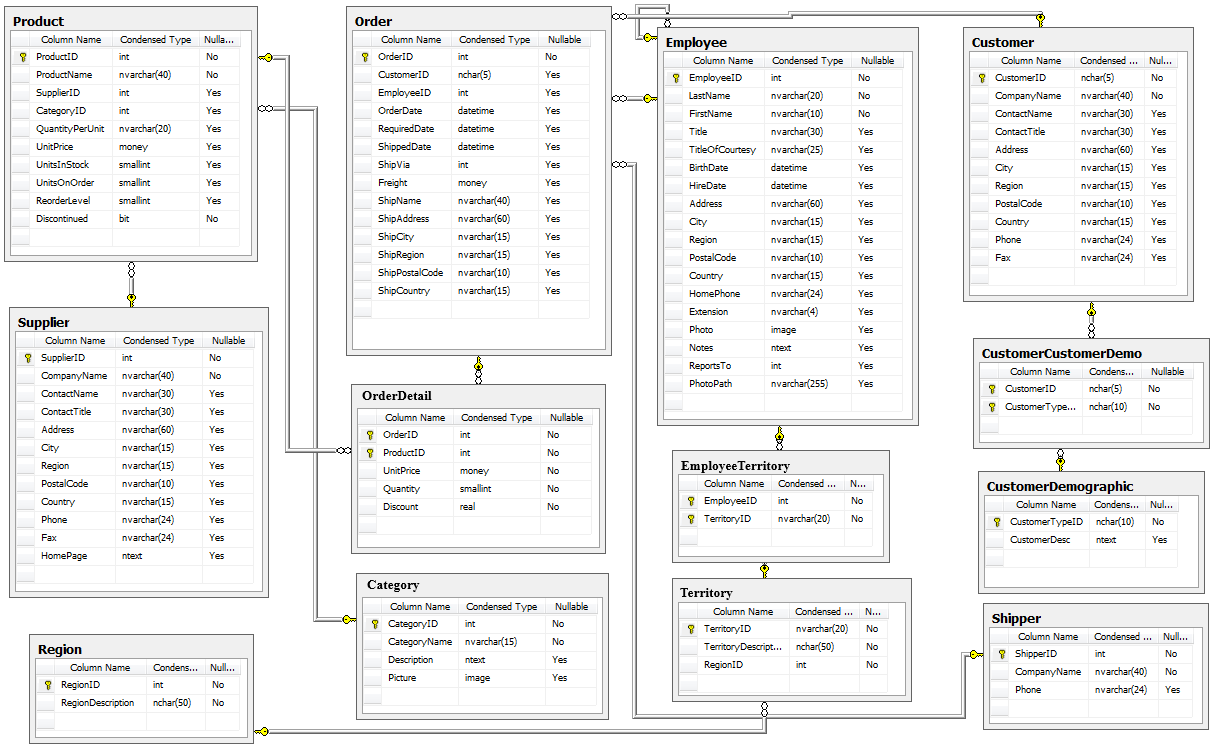

In [2]:
from IPython.display import Image
Image("Northwind_ERD.png")

# Is The Cost of Delivery effected by statistically significant by; 

2.1) The Delivery Company Used 

2.2) The Country of the Supplier 

2.3) The Country of the Customer 

<b>Build SQL query that will contain the information required to answer Question 2</b>

In [3]:
cur.execute("""SELECT A.CompanyName AS SupplierName, E.CompanyName AS DelComp, A.City AS SupCity, 
                A.Country AS SupCountry, F.City AS CustCity, F.Country AS CustCountry,
                ProductName, C.Quantity, D.Freight, B.UnitPrice, B.UnitsInStock, B.UnitsOnOrder,
                D.OrderDate, D.RequiredDate, D.ShippedDate 
                
                FROM [Supplier] A
                JOIN [Product] B
                ON (A.Id = B.SupplierId)
                JOIN [OrderDetail] C
                ON (B.Id = C.ProductId)
                JOIN [Order] D
                ON (C.OrderId = D.Id)
                JOIN [Shipper] E
                ON (D.ShipVia = E.Id)
                JOIN [Customer] F
                ON (D.CustomerId = F.Id)
                
                ORDER BY D.OrderDate
                """)
df_Shipping = pd.DataFrame(cur.fetchall())
df_Shipping.columns = [x[0] for x in cur.description]
df_Shipping.head()

,SupplierName,DelComp,SupCity,SupCountry,CustCity,CustCountry,ProductName,Quantity,Freight,UnitPrice,UnitsInStock,UnitsOnOrder,OrderDate,RequiredDate,ShippedDate
0,Cooperativa de Quesos 'Las Cabras',Federal Shipping,Oviedo,Spain,Reims,France,Queso Cabrales,12,32.38,21.00,22,30,2012-07-04,2012-08-01,2012-07-16
1,Leka Trading,Federal Shipping,Singapore,Singapore,Reims,France,Singaporean Hokkien Fried Mee,10,32.38,14.00,26,0,2012-07-04,2012-08-01,2012-07-16
2,Formaggi Fortini s.r.l.,Federal Shipping,Ravenna,Italy,Reims,France,Mozzarella di Giovanni,5,32.38,34.80,14,0,2012-07-04,2012-08-01,2012-07-16
3,Mayumi's,Speedy Express,Osaka,Japan,Münster,Germany,Tofu,9,11.61,23.25,35,0,2012-07-05,2012-08-16,2012-07-10
4,"G'day, Mate",Speedy Express,Sydney,Australia,Münster,Germany,Manjimup Dried Apples,40,11.61,53.00,20,0,2012-07-05,2012-08-16,2012-07-10


Conduct a preliminary investigation using stats-mod Ordinary Least Square (OLS) function.

In [4]:
# Looking at the frieght cost...
formula = 'Freight ~ C(DelComp) + C(SupCountry) + C(CustCountry)'
lm = ols(formula, df_Shipping).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                      sum_sq      df          F        PR(>F)
C(DelComp)      1.967336e+05     2.0   6.647929  1.324979e-03
C(SupCountry)   6.443647e+05    15.0   2.903209  1.451794e-04
C(CustCountry)  4.252006e+06    20.0  14.368179  1.023179e-45
Residual        3.018508e+07  2040.0        NaN           NaN


- 

In [5]:
# Looking at the quantity on delivery...
formula = 'Quantity ~ C(DelComp) + C(SupCountry) + C(CustCountry)'
lm = ols(formula, df_Shipping).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                       sum_sq      df          F        PR(>F)
C(DelComp)         715.505154     2.0   1.102936  3.320931e-01
C(SupCountry)     7721.459369    15.0   1.586995  6.959924e-02
C(CustCountry)   92488.904599    20.0  14.256966  2.553278e-45
Residual        661702.389385  2040.0        NaN           NaN


## Does a Delivery Company have a statistically significant effect on cost?

<b>Null Hypothesis</b>

No company is cheaper per delivery when compared to the others.

$H_{0} : \mu_{Company A} = \mu_{Company B}$


<b>Alternative Hypothesis</b>

A company is cheaper per delivery when compared to the others.

$H_{A} : \mu_{Company A} \neq \mu_{Company B}$


Create DataFrames for each company

In [6]:
df_Federal = df_Shipping.loc[df_Shipping['DelComp'] == 'Federal Shipping']
df_United = df_Shipping.loc[df_Shipping['DelComp'] == 'United Package']
df_Speedy = df_Shipping.loc[df_Shipping['DelComp'] == 'Speedy Express']
print(f"Federal {df_Federal.shape[0]} orders.")
print(f"United {df_United.shape[0]} orders.")
print(f"Speedy {df_Speedy.shape[0]} orders.")

Federal 638 orders.
United 827 orders.
Speedy 613 orders.


Means Shipping Costs:
---------------------
Federal: 98.955
United:  102.962
Speedy:  81.799


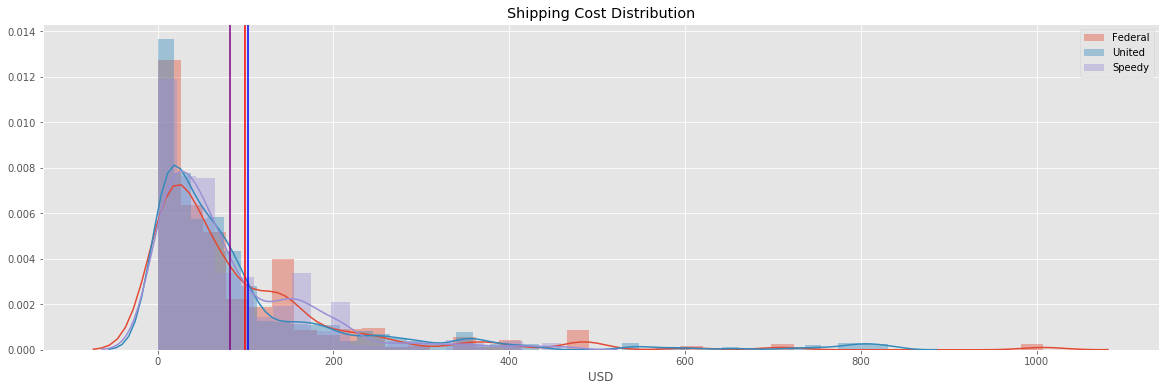

In [7]:
print("Means Shipping Costs:")
print("---------------------")
print(f"Federal: {df_Federal['Freight'].mean():.3f}")
print(f"United:  {df_United['Freight'].mean():.3f}")
print(f"Speedy:  {df_Speedy['Freight'].mean():.3f}")


plt. figure(figsize=(20,6))

# Freight Cost Distribution
sns.distplot(df_Federal['Freight'], label="Federal")
sns.distplot(df_United['Freight'], label="United")
sns.distplot(df_Speedy['Freight'], label="Speedy")

# Freight Cost Means
plt.axvline(x=df_Federal['Freight'].mean(), color='red')
plt.axvline(x=df_United['Freight'].mean(), color='blue')
plt.axvline(x=df_Speedy['Freight'].mean(), color='purple')


plt.title("Shipping Cost Distribution")
plt.xlabel("USD")

plt.legend()
plt.show()

The above distribution is logarithmic, so lets have a quick look at the log Freight Cost distribution of each company. 

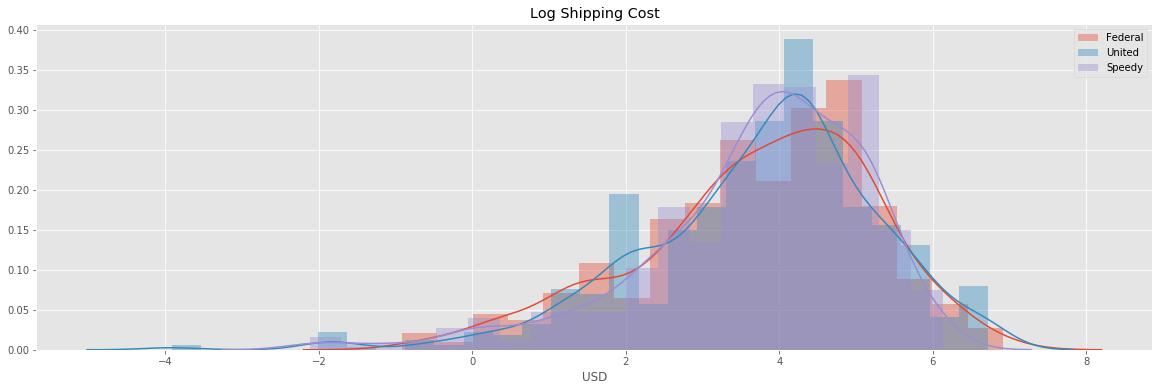

In [8]:
plt. figure(figsize=(20,6))

# Log freight cost comapny comparison
sns.distplot(np.log(df_Federal['Freight']), label="Federal")
sns.distplot(np.log(df_United['Freight']), label="United")
sns.distplot(np.log(df_Speedy['Freight']), label="Speedy")
plt.title("Log Shipping Cost")
plt.xlabel("USD")

plt.legend()
plt.show()

### ANOVA Comparison  

In this section I an going to use Tukey's test or Tukeyhsd test, which is a single-step multiple comparison procedure and statistical test. It can be used to find means that are significantly different from each other. It is essentially a t-test except that it corrects the family-wise error-rate (all combinations), like the Bonferroni test.

In [9]:
# Possible combnation for the Mulitcomparison.
delcomp = df_Shipping['DelComp'].unique()
list(itertools.combinations(delcomp, 2))

[('Federal Shipping', 'Speedy Express'),
 ('Federal Shipping', 'United Package'),
 ('Speedy Express', 'United Package')]

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------
Federal Shipping Speedy Express -17.1556 0.0516 -34.4042  0.0931  False
Federal Shipping United Package   4.0071 0.8091 -12.0632 20.0773  False
  Speedy Express United Package  21.1627 0.0065   4.9085 37.4168   True
-----------------------------------------------------------------------


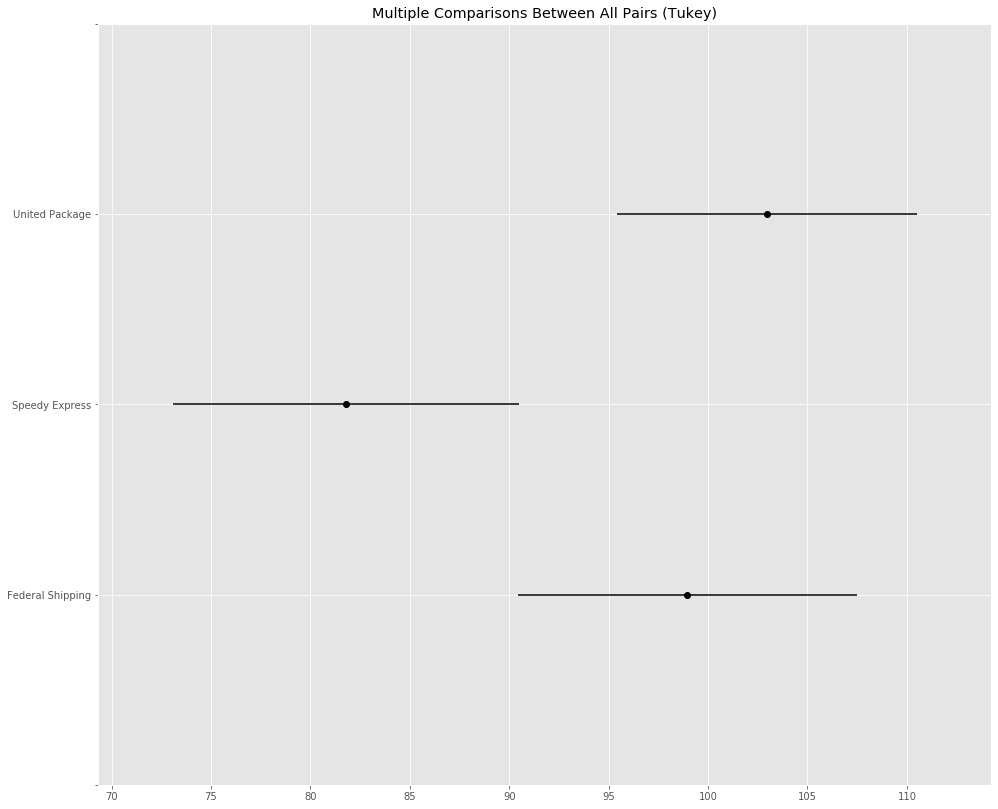

In [10]:
mc = MultiComparison(df_Shipping['Freight'], df_Shipping['DelComp'])
mc_results = mc.tukeyhsd()
print(mc_results)

mc_results = mc_results.plot_simultaneous(figsize=(16,14))
plt.show()

<b>Observations</b>

<i>Speedy Express</i> is statistically the cheapest company to use. 

### Linear Regression Confirmation

Federal Regression Diagnostics
----------------------------
Sample Size: 638
Slope: 2.65
Y-Intercept: 35.37
Correlation: 0.37
R-Squared: 0.137
----------------------------
Model: Y = 2.65 * X + 35.37


United Regression Diagnostics
----------------------------
Sample Size: 827
Slope: 3.42
Y-Intercept: 23.71
Correlation: 0.411
R-Squared: 0.169
----------------------------
Model: Y = 3.42 * X + 23.71


Speedy Regression Diagnostics
----------------------------
Sample Size: 613
Slope: 1.61
Y-Intercept: 41.75
Correlation: 0.385
R-Squared: 0.148
----------------------------
Model: Y = 1.61 * X + 41.75


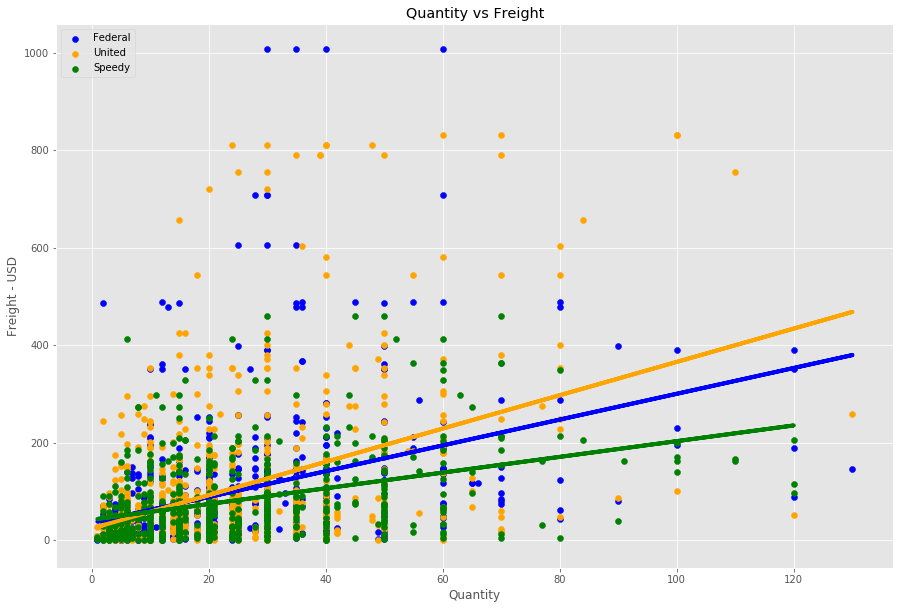

In [14]:
compare_reg_basic_and_plot(df_Federal.Quantity, df_Federal.Freight, 
                           df_United.Quantity, df_United.Freight, 
                           df_Speedy.Quantity, df_Speedy.Freight, 
                           "Quantity vs Freight", "Quantity", "Freight - USD", "Federal", "United", "Speedy")

## The Country of the Supplier, has a statistically significant effect on the freight cost.

<b>Null Hypothesis</b>

The country of the Supplier does NOT have an effect on the freight cost.

$H_{0} : \mu_{Country_A} = \mu_{Country_B}$


<b>Alternative Hypothesis</b>

One or more countries of the any Supplier does have an effect on the freight cost.

$H_{A} : \mu_{Country_A} \neq \mu_{Country_B}$


       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj    lower    upper   reject
-----------------------------------------------------------------
  Australia      Brazil -22.7741    0.9     -91.5  45.9519  False
  Australia      Canada   0.8834    0.9  -45.9652   47.732  False
  Australia     Denmark  10.4744    0.9  -64.2926  85.2413  False
  Australia     Finland  -2.3935    0.9  -63.7607  58.9738  False
  Australia      France  58.2169  0.001   14.2969  102.137   True
  Australia     Germany   22.303 0.8305  -16.8971  61.5032  False
  Australia       Italy   9.0738    0.9  -34.7698  52.9173  False
  Australia       Japan  -9.2316    0.9  -58.9954  40.5323  False
  Australia Netherlands -17.4087    0.9 -110.5334   75.716  False
  Australia      Norway  -7.9201    0.9  -60.3489  44.5088  False
  Australia   Singapore  15.3519    0.9  -42.1432   72.847  False
  Australia       Spain  13.2729    0.9  -56.6399  83.1856  False
  Australi

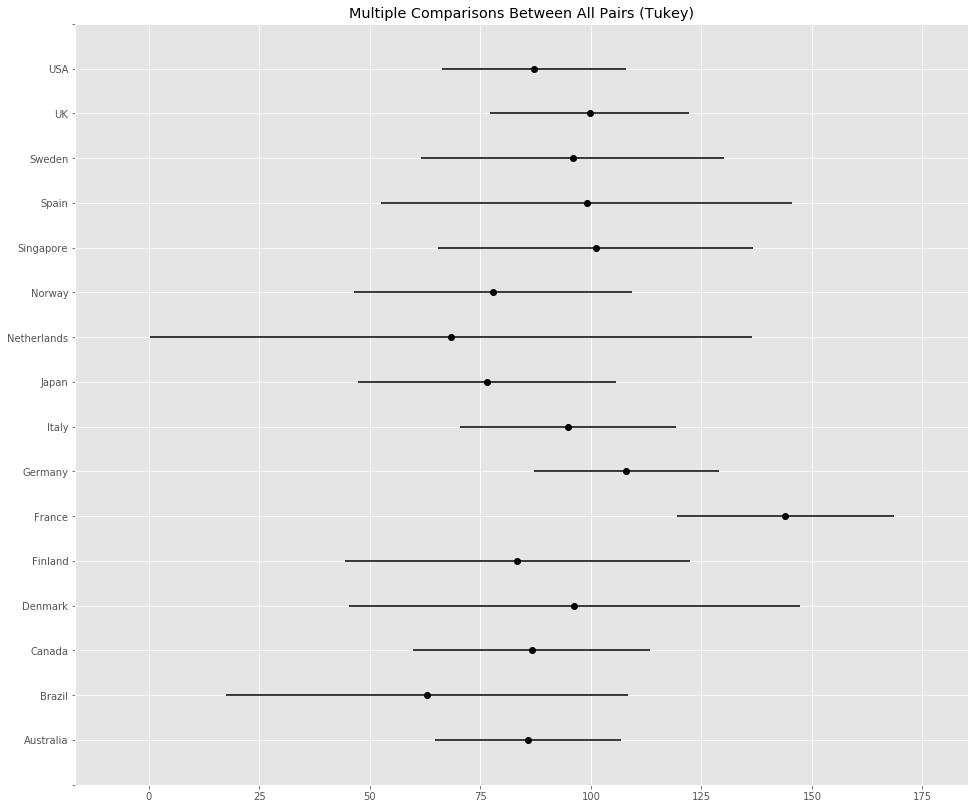

In [15]:
mc = MultiComparison(df_Shipping['Freight'], df_Shipping['SupCountry'])
mc_results = mc.tukeyhsd() # alpha = 5%
print(mc_results)

mc_results_plot = mc_results.plot_simultaneous(figsize=(16,14))
plt.show()

This results are long, so I'll put it into a DataFrame and ask for only the `reject == true`

In [16]:
df_SupCountry = pd.DataFrame(data=mc_results._results_table.data[1:], columns=mc_results._results_table.data[0])

In [17]:
df_SupCountry = df_SupCountry.loc[df_SupCountry['reject']==True]
df_SupCountry

,group1,group2,meandiff,p-adj,lower,upper,reject
4,Australia,France,58.2169,0.0010,14.2969,102.1370,True
18,Brazil,France,80.9910,0.0101,9.5514,152.4306,True
31,Canada,France,57.3335,0.0106,6.5876,108.0795,True
66,France,Italy,-49.1431,0.0384,-97.1287,-1.1575,True
67,France,Japan,-67.4485,0.0017,-120.8975,-13.9994,True
69,France,Norway,-66.1370,0.0053,-122.0757,-10.1983,True
74,France,USA,-56.7913,0.0010,-100.4423,-13.1402,True


<b>Observations</b>

When observing the results of the Tukey HSD, France is present in all cases of statistical significance.   

## The Country of the Customer, has a statistically significant effect on the freight cost.

<b>Null Hypothesis</b>

The country of the Customer does NOT have an effect on the freight cost.

$H_{0} : \mu_{Country_A} = \mu_{Country_B}$


<b>Alternative Hypothesis</b>

One or more Countries of the customer has a significantly higher freight cost.

$H_{A} : \mu_{Country_A} \neq \mu_{Country_B}$

In [18]:
mc = MultiComparison(df_Shipping['Freight'], df_Shipping['CustCountry'])
mc_results = mc.tukeyhsd()

In [29]:
df_CustCountry = pd.DataFrame(data=mc_results._results_table.data[1:], columns=mc_results._results_table.data[0])
df_CustCountry = df_CustCountry.loc[df_CustCountry['reject']==True]
df_CustCountry['meandiff'] = abs(df_CustCountry['meandiff'])
df_CustCountry.sort_values(by=['meandiff'], ascending=False)

,group1,group2,meandiff,p-adj,lower,upper,reject
31,Austria,Poland,193.0059,0.0010,-309.5718,-76.4400,True
0,Argentina,Austria,192.1341,0.0010,92.5273,291.7409,True
28,Austria,Italy,182.0611,0.0010,-254.0216,-110.1006,True
33,Austria,Spain,177.0506,0.0010,-248.5417,-105.5595,True
29,Austria,Mexico,175.2657,0.0010,-246.3015,-104.2299,True
21,Austria,Brazil,175.1243,0.0010,-227.3188,-122.9298,True
24,Austria,Finland,168.6276,0.0010,-240.1187,-97.1366,True
30,Austria,Norway,165.7859,0.0010,-282.3518,-49.2200,True
32,Austria,Portugal,163.5339,0.0010,-252.7878,-74.2799,True
36,Austria,UK,158.9587,0.0010,-213.4519,-104.4656,True


<b>Observations</b>

When observing the results of the Tukey HSD, Austria dominates the absolute mean difference. Cost of shipping to companies in Austria are statistically significant.

In [38]:
# Calculate the number of occurances
a = df_CustCountry['group1'].value_counts()
b = df_CustCountry['group2'].value_counts()
a.add(b, fill_value=0)

Argentina       2.0
Austria        20.0
Belgium         1.0
Brazil          5.0
Canada          1.0
Denmark         1.0
Finland         2.0
France          3.0
Germany         8.0
Ireland         5.0
Italy           4.0
Mexico          4.0
Norway          1.0
Poland          1.0
Portugal        1.0
Spain           4.0
Sweden          2.0
Switzerland     1.0
UK              3.0
USA            10.0
Venezuela       3.0
dtype: float64